Messing around with the Pulsar Data

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import plotly.express as px
from IPython.display import Image

Column names taken from HTRU_2.arff file because the csv doesn't have column names

In [3]:
column_names = [
    'Profile_mean', 'Profile_stdev', 'Profile_skewness', 'Profile_kurtosis', 
    'DM_mean', 'DM_stdev', 'DM_skewness', 'DM_kurtosis', 'Class'
]
df = pd.read_csv('HTRU_2.csv', names=column_names,header=None)
df.head()

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


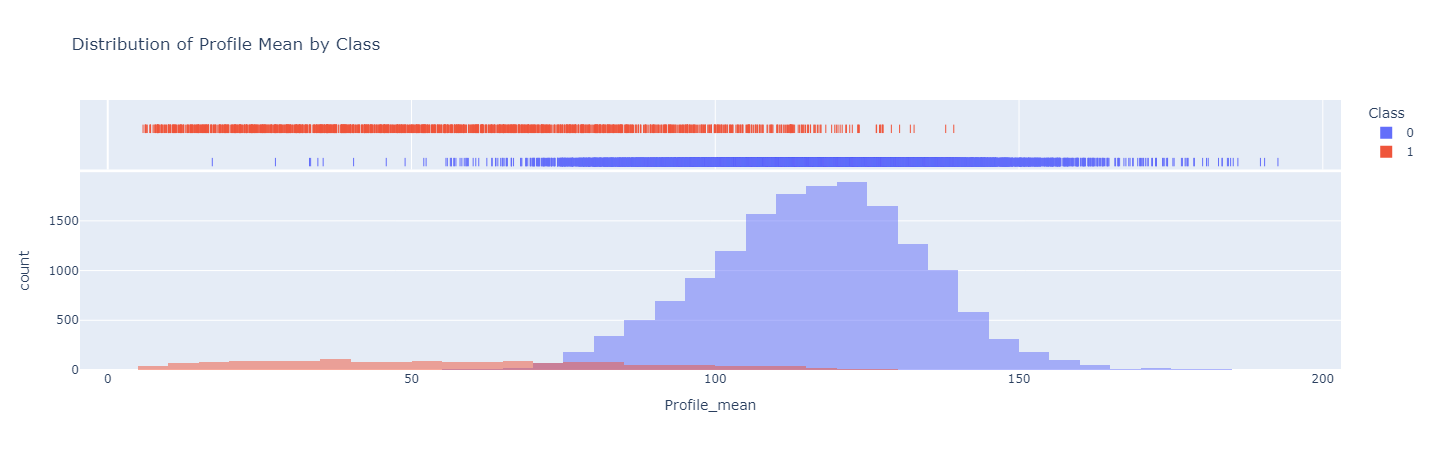

In [5]:
fig = px.histogram(
    df,
    x='Profile_mean',
    color='Class',
    barmode='overlay',
    nbins=50,
    marginal='rug',
    title='Distribution of Profile Mean by Class'
)
Image("figures/profile_mean_distribution.png")



In [ ]:
features = ['Profile_skewness', 'Profile_kurtosis', 'DM_skewness', 'DM_kurtosis']
fig = px.scatter_matrix(
    df,
    dimensions=features,
    color='Class',
    title='Pairwise Scatter Matrix of Selected Features'
)
fig.update_traces(diagonal_visible=False)
fig.write_image("figures/scatter_matrix.png")
fig.show()

In [13]:
fig = px.parallel_coordinates(
    df,
    dimensions=[
        'Profile_mean','Profile_stdev','Profile_skewness','Profile_kurtosis',
        'DM_mean','DM_stdev','DM_skewness','DM_kurtosis'
    ],
    color='Class',
    color_continuous_scale=px.colors.diverging.Tealrose,
    title='Parallel Coordinates of All Features'
)
fig.show()

In [9]:
print(df.isnull().sum().sum())

0


No null values in data

In [7]:
y = df['Class']
X = df.drop('Class',axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=62)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (12528, 8)
X_test shape: (5370, 8)
y_train shape: (12528,)
y_test shape: (5370,)


0
